In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
if "housing" in os.path.abspath(os.path.curdir): os.chdir("..")
BASE_DIR = os.path.abspath(os.path.curdir)

In [3]:
def load_csv(dir_name, file_name):
    csv_path = os.path.join(BASE_DIR, "datasets", dir_name, file_name)
    return pd.read_csv(csv_path)

In [35]:
class Library:
    
    def __init__(self, df):
        self.df = df
        self.attrs = {}
        
    def update_attrs(self, dict_):
        assert isinstance(dict_, dict), "only accepts dict type objects" 
        self.attrs.update(dict_)
        print(f"attributes library updated with key:{list(dict_.keys())}")
    
    def get_attrs(self):
        return self.attrs
    
    def get_df(self):
        return self.df

In [36]:
# dataset link: https://www.kaggle.com/c/house-prices-advanced-regression-techniques
df = load_csv("housing", "advanced_housing_train_kaggle.csv")

In [37]:
lib = Library(df)

In [38]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Check missing values

In [58]:
lib.update_attrs({"label": ["SalePrice"], "id": ["id"]})

attributes library updated with key:['label', 'id']


In [39]:
df.isnull().sum().reset_index().rename(
    columns={0: "count_null", "index": "variable"}).sort_values(
    "count_null", ascending=False).head(25)

,variable,count_null
72,PoolQC,1453
74,MiscFeature,1406
6,Alley,1369
73,Fence,1179
57,FireplaceQu,690
3,LotFrontage,259
59,GarageYrBlt,81
64,GarageCond,81
58,GarageType,81
60,GarageFinish,81


In [40]:
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)

In [43]:
cat_attrs = [c_ for c_ in df.columns if df[c_].dtypes == "object"]
lib.update_attrs({"cat_attrs": cat_attrs})

attributes library updated with key:['cat_attrs']


In [44]:
num_attrs = [c_ for c_ in df.columns if c_ not in cat_attrs]
lib.update_attrs({"num_attrs": num_attrs})

attributes library updated with key:['num_attrs']


In [45]:
dis_attrs = [c_ for c_ in num_attrs if len(df[c_].value_counts())/len(df) < 0.02]
lib.update_attrs({"dis_attrs": dis_attrs})

attributes library updated with key:['dis_attrs']


In [48]:
df.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.000072,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451

## Common Feature Engineering

In [196]:
def finding_biased_attrs(df, list_, ratio):
    """
    Function gives biased attributes with respect to ratio specified.
    
    Note:The term bias means the high frequency occurance of single value
    in whole feature set.
    """
    attrs = []
    for attr in list_:
        max_values = df[attr].value_counts(ascending=False).values[0]   
        if max_values / df[attr].value_counts().values.sum() >= ratio: attrs.append(attr)
    return attrs

In [198]:
biased_attrs = finding_biased_attrs(df, dis_attrs+cat_attrs, 0.9)
lib.update_attrs({"biased_num_cat_attrs": biased_attrs})

attributes library updated with key:['biased_num_cat_attrs']


## Numerical Feature Engineering

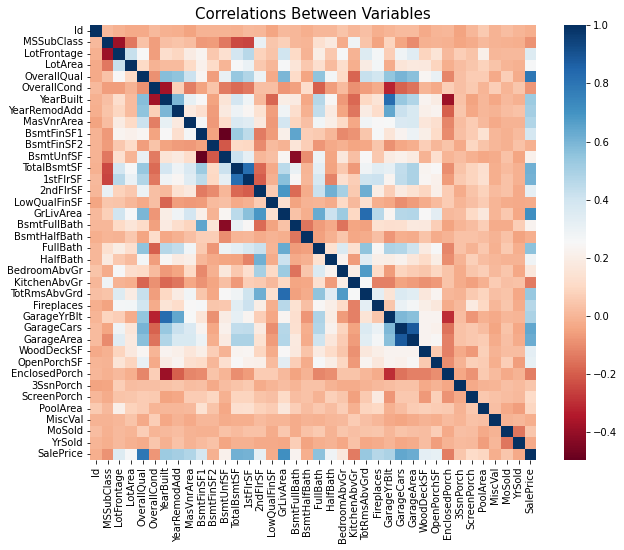

In [190]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="RdBu")
plt.title("Correlations Between Variables", size=15)
plt.show()

In [50]:
# histogram is good for numerical/discrete values
def plot_hist(df, attr_list):
    for atr in attr_list:
        bins = len(df[atr].value_counts()) if len(df[atr].value_counts()) < 25 else 25
        df[atr].plot.hist(figsize=(5, 5), bins=bins)
        plt.title(atr)
        plt.ylabel("counts")
        plt.xlabel("values")
        plt.show()

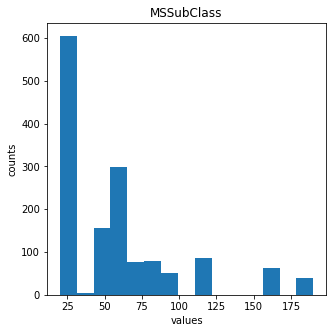

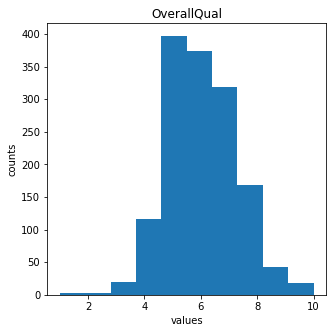

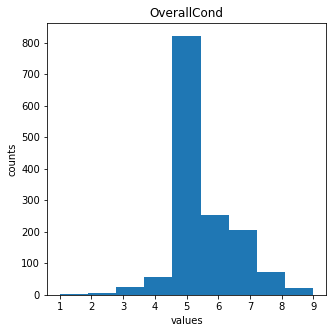

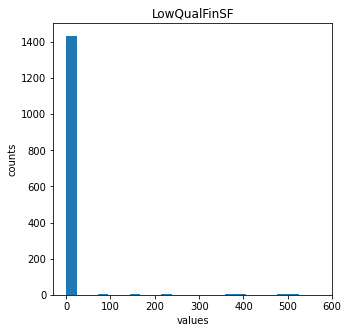

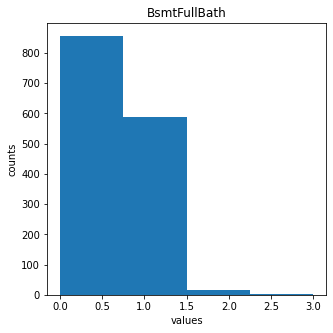

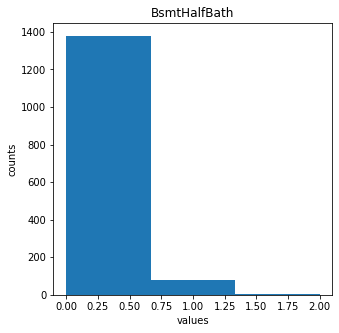

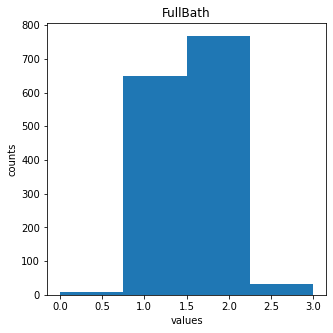

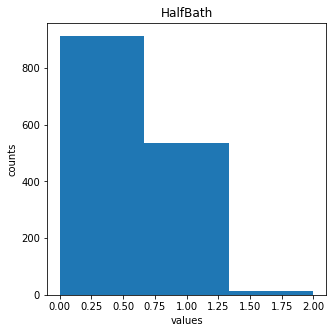

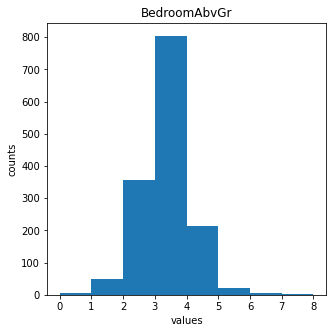

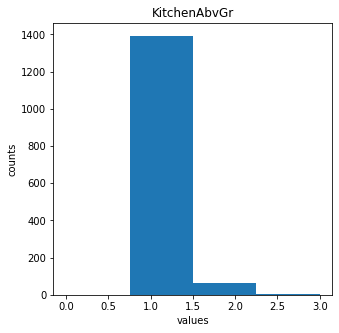

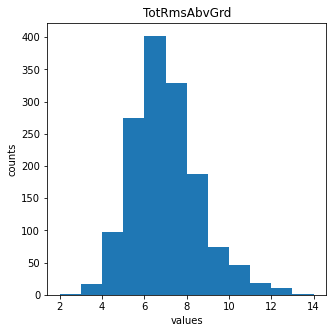

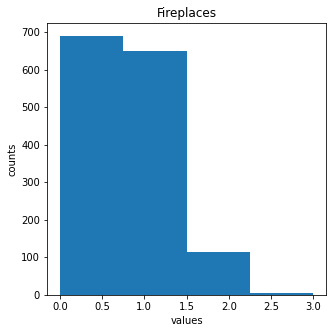

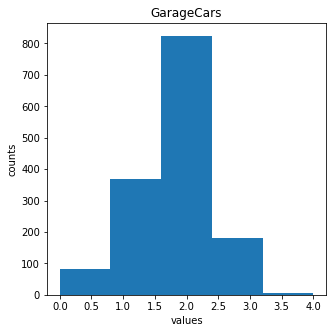

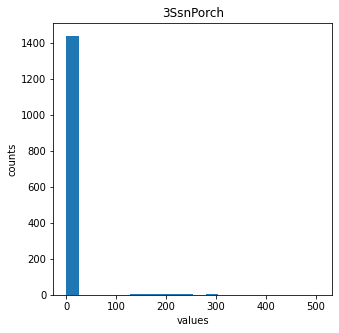

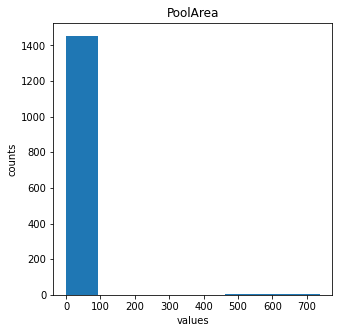

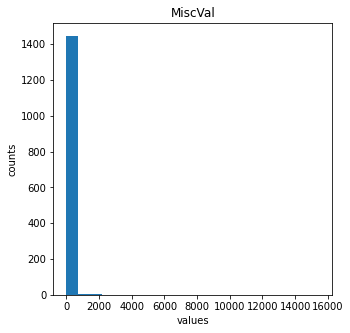

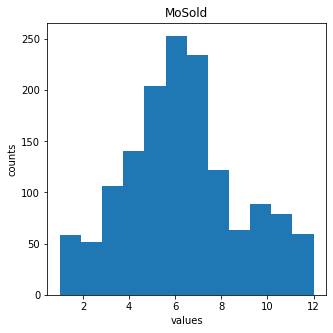

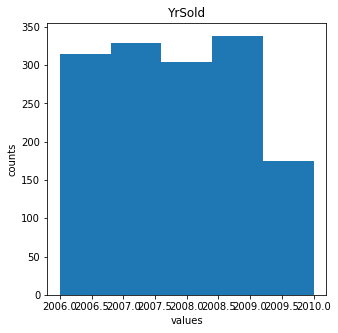

In [52]:
plot_hist(df, dis_attrs)

In [56]:
class Correlatiion:
    
    def __init__(self, df, attrs_list, core_with, ratio=0):
        self.df = df
        self.attrs_list = attrs_list
        self.core_with = core_with
        self.ratio = ratio
        self.imp = []
        self.all = []
    
    def get_imp_cor_attrs(self):
        if not self.imp: self.find_corr()
        return self.imp

    def find_corr(self):
        corr_matrix = self.df[self.attrs_list].corr()
        srs = corr_matrix[self.core_with].sort_values(ascending=False)
        for index, value in zip(srs.index, srs.values):
            if abs(value) >= self.ratio and index != self.core_with :
                self.imp.append(index)
            self.all.append((index, value))
        return self.all

In [57]:
corr = Correlatiion(df, num_attrs, "SalePrice", ratio=0.5)
imp_num_attrs = corr.get_imp_cor_attrs()
lib.update_attrs({"imp_num_attrs": imp_num_attrs})

attributes library updated with key:['imp_num_attrs']


## Categorical Feature Engineering

In [191]:
# bar plot is good for categorical values
def plot_bar(df, attr_list):
    for atr in attr_list:
        df[atr].value_counts().plot.bar(figsize=(5, 5)) 
        plt.title(atr)
        plt.ylabel("counts")
        plt.xlabel("values")
        plt.show()

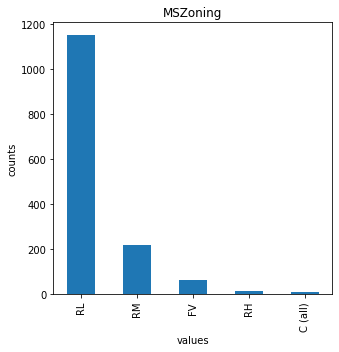

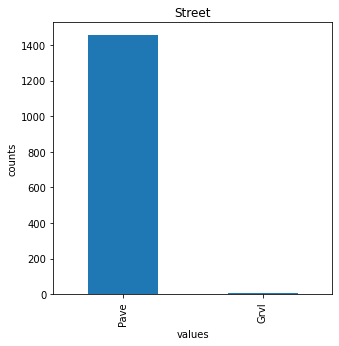

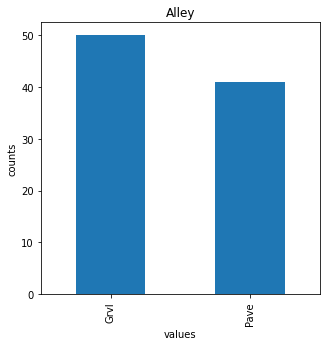

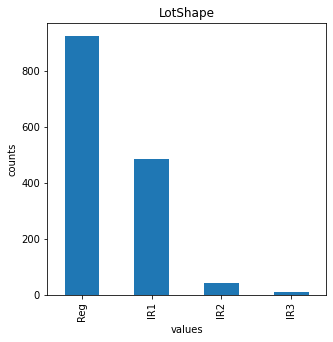

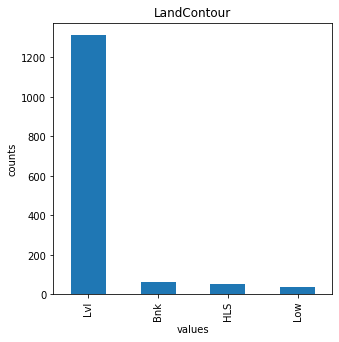

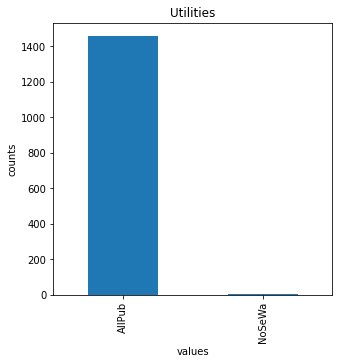

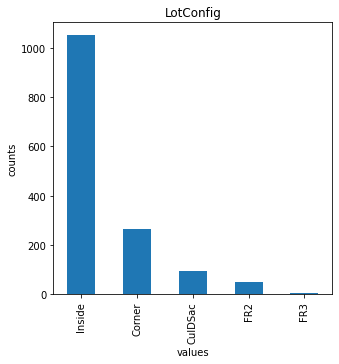

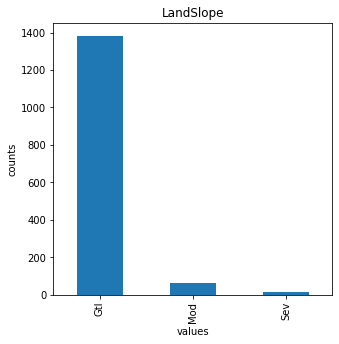

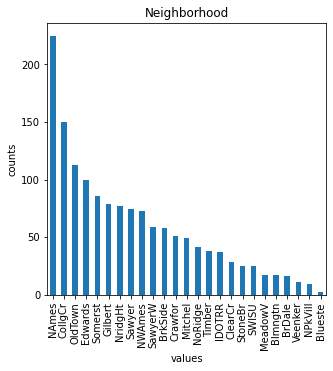

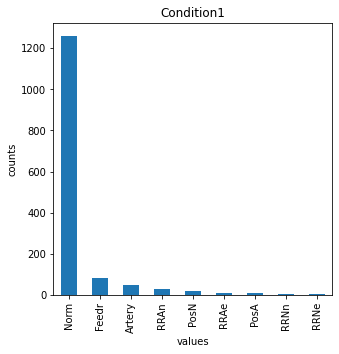

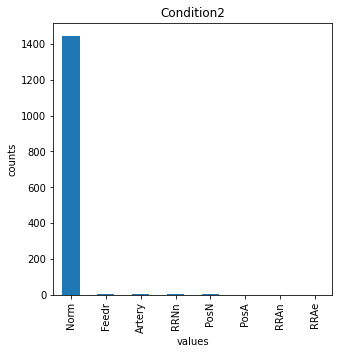

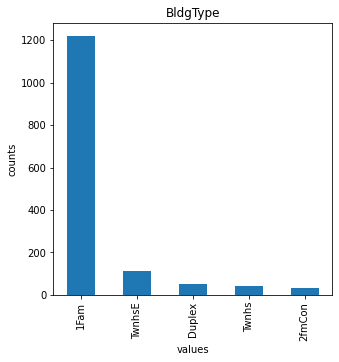

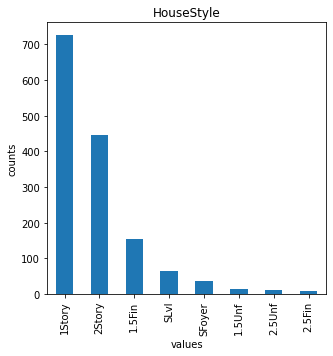

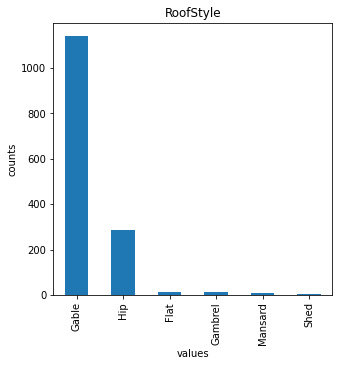

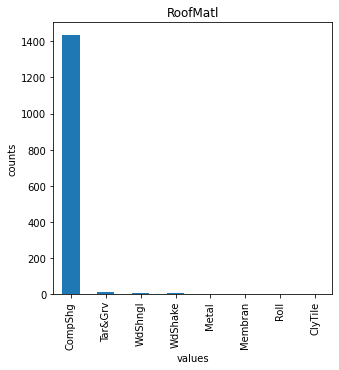

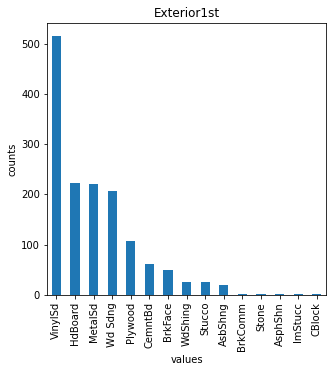

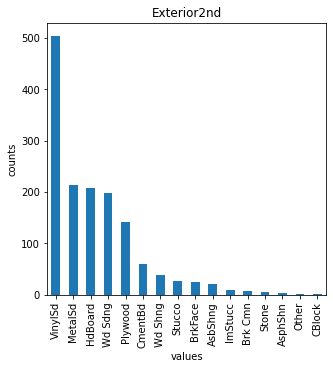

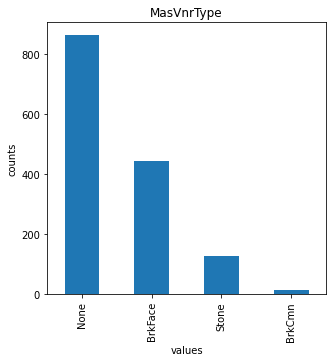

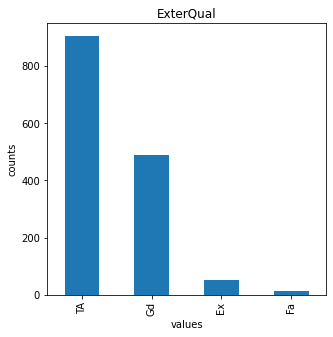

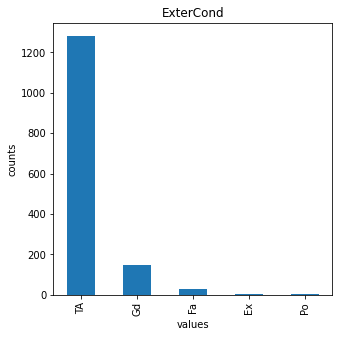

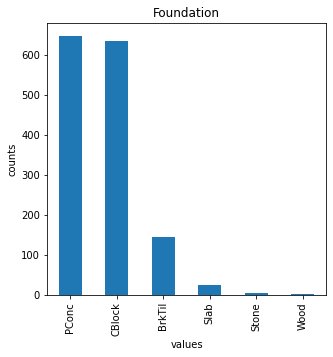

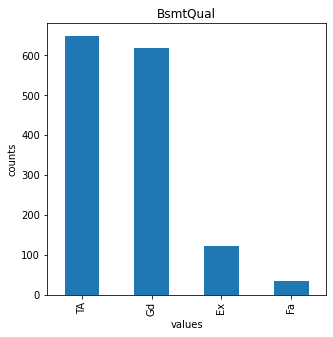

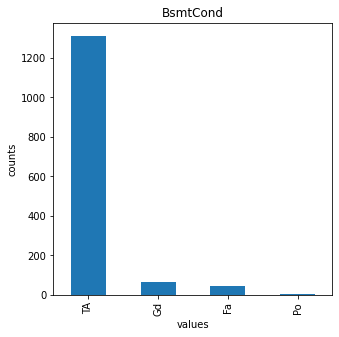

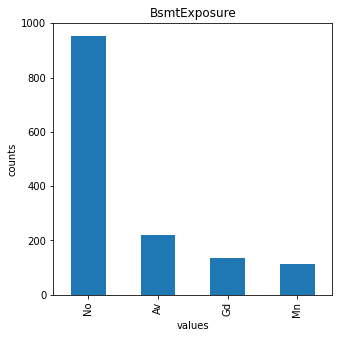

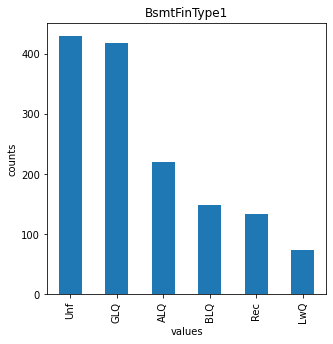

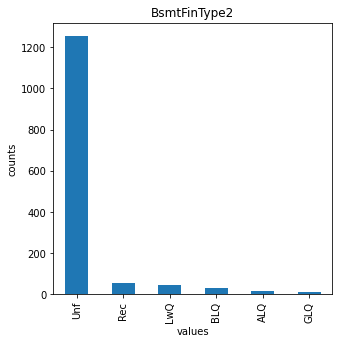

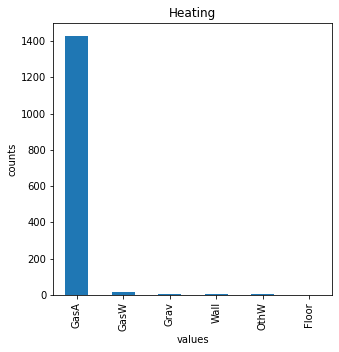

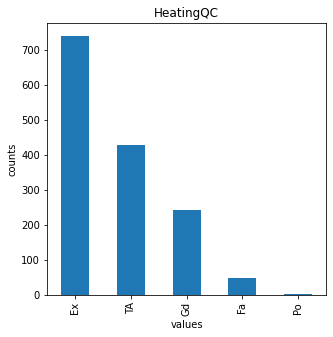

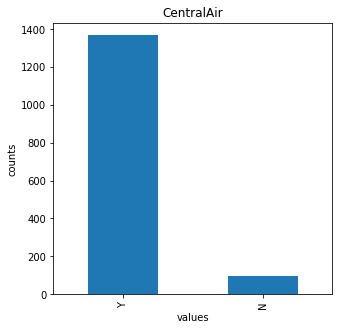

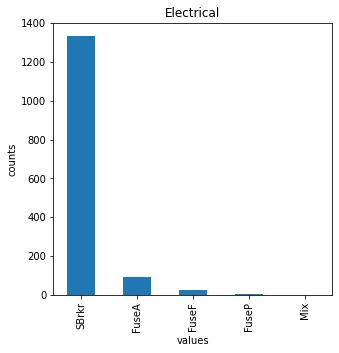

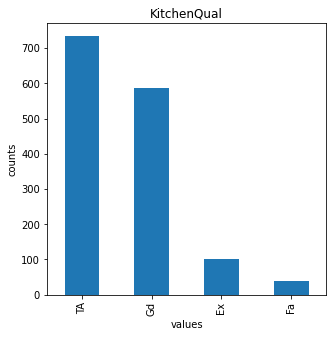

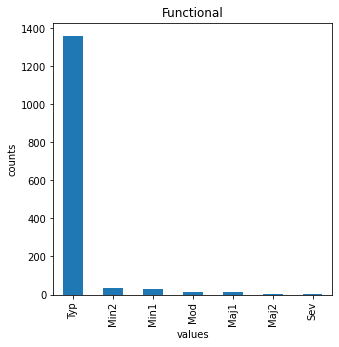

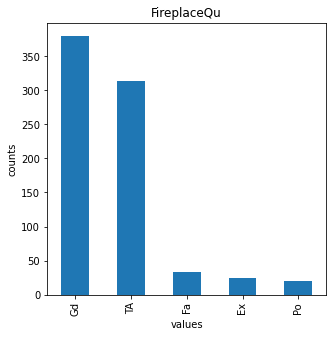

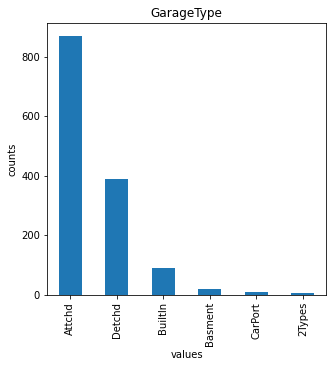

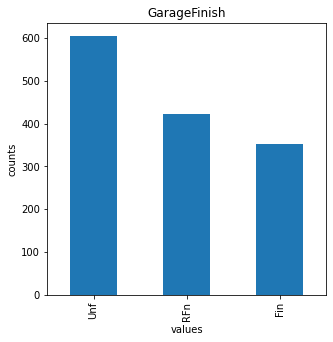

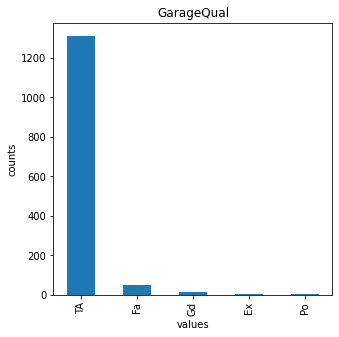

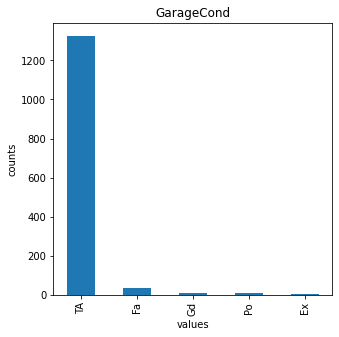

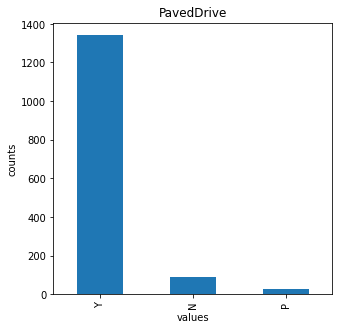

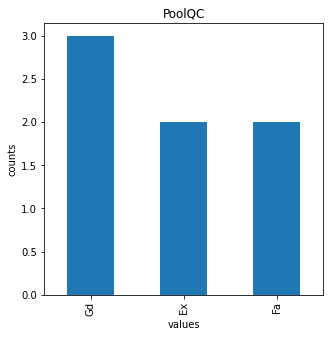

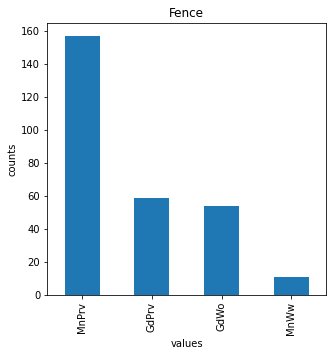

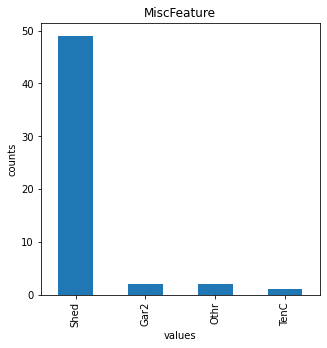

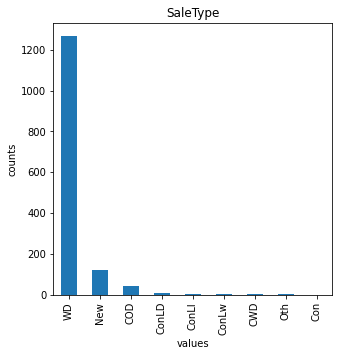

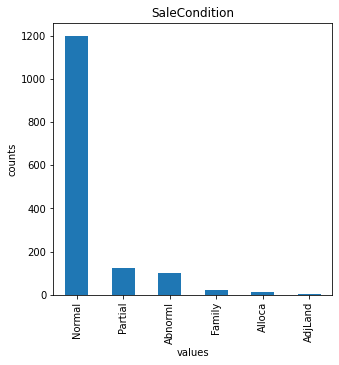

In [192]:
plot_bar(df, cat_attrs)

In [181]:
from scipy.stats import chi2_contingency

def chi2_test(df, attrs_list, with_):
    """
    The Chi-Square test of independence is used to determine if there 
    is a significant relationship between two categorical (nominal) variables.
    
    Null Hypothesis (H0): There is no relationship between the variables
    Alternative Hypothesis (H1): There is a relationship between variables
    
    If we choose our p-value level to 0.05, as the p-value test result is more than 
    0.05 we fail to reject the Null Hypothesis. This means, there is no relationship 
    between based on the Chi-Square test of independence.
    
    ref: https://towardsdatascience.com/categorical-feature-selection-via-chi-square-fc558b09de43
    
    Note: chisquare test can only be apply to find relationship between categorical variables
    """
    ral_attrs = [] # relative attributes
    for attr in attrs_list: 
        chi_res = chi2_contingency(pd.crosstab(df[with_], df[attr]))
#         print(f"Chi2 Statistic: {chi_res[0]}, p-value: {chi_res[1]}")
        if chi_res[1] < 0.05: attrs.append(attr)
    return ral_attrs

In [182]:
def post_hoc_test(df, attrs_list, with_):
    """
    If we have multiple classes within a category, we would not be able to 
    easily tell which class of the features are responsible for the 
    relationship if the Chi-square table is larger than 2×2. To pinpoint which 
    class is responsible, we need a post hoc test. o do this, we could apply 
    OneHotEncoding to each class and create a new cross-tab table against the other feature
    
    However, there is something to remember. Comparing multiple classes against 
    each other would means that the error rate of a false positive compound 
    with each test. For example, if we choose our first test at p-value level 
    0.05 means there is a 5% chance of a false positive; if we have multiple classes, 
    the test after that would compounding the error with the chance become 
    10% of a false positive, and so forth. With each subsequent test, 
    the error rate would increase by 5%. Let's consider we had 3 pairwise 
    comparisons. This means that our Chi-square test would have an error rate of 
    15%. Meaning our p-value being tested at would equal 0.15, which is quite high.
    
    In this case, we could use the Bonferroni-adjusted method for correcting the p-value 
    we use. We adjust our P-value by the number of pairwise comparisons we want to do. 
    The formula is p/N, where p= the p-value of the original test and N= the number of 
    planned pairwise comparisons. For example, in our case, above we have 3 class 
    within the categorical feature; which means we would have 3 pairwise comparisons 
    if we test all the class against the labels(or categorical) feature. Our P-value 
    would be 0.05/3 = 0.0167
    """
    attrs =  [] # relative attributes
    for attr in attrs_list:
        dummies = pd.get_dummies(data=df[attr], columns=[attr]) # creates onehotencoding
        for i in range(len(dummies.columns)):
            p_value = 0.05 / len(dummies.columns)
            chi_res = chi2_contingency(pd.crosstab(df[with_], dummies[dummies.columns[i]]))
#             print(dummies.columns[i])
#             print(f"Chi2 Statistic: {chi_res[0]}, p-value: {chi_res[1]}")
            if chi_res[1] < p_value: attrs.append((attr, dummies.columns[i]))
    return attrs

**IMPORTANT NOTE:** 
- Both the above test is only to find the relation between the two categorical features only.

In [183]:
# sample test to check chi-square test 
cat_22 = [c for c in cat_attrs if df[c].nunique()<=2] # as chi2 test only for binary class featuers
with_ = "Utilities"
cat_22.remove(with_)
rel_chi_attrs = chi2_test(df, cat_22, with_)
rel_chi_attrs

[]

In [185]:
# sample test to check post-hoc-test
cat_multiclass = [c for c in cat_attrs if df[c].nunique()>2] # as post-hoc-test is for multiclass features
with_ = "Utilities"
rel_poc_attrs = post_hoc_test(df, cat_multiclass, with_)
rel_poc_attrs

[('GarageType', 'Basment'), ('SaleType', 'COD')]

In [188]:
lib.attrs.keys()

dict_keys(['cat_attrs', 'num_attrs', 'dis_attrs', 'imp_num_attrs', 'label', 'id', 'biased_num_cat_attrs'])

In [189]:
lib.attrs["imp_num_attrs"]

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd']